# Pengenalan Tulisan Tangan Digital Hanacaraka Menggunakan CNN

Mochammad Arya Salsabila / 19081010001 / Pengenalan Pola Paralel B Tahun 2021 / Final Project UAS

Link download project: https://github.com/arryaaas/Hanacaraka-Digital-Handwriting-CNN

### A. Menghubungkan Google Colab Dengan Google Drive

In [2]:
from google.colab import drive

drive._mount("/content/gdrive/")

Mounted at /content/gdrive/


### B. Mengekstrak Dataset

Dataset hanacaraka terdiri dari 20 folder yaitu ha, na, ca, ra, ka, da, ta, sa, wa, la, pa, dha, ja, ya, nya, ma, ga, ba, tha, dan nga yang masing-masing folder terdiri dari 510 gambar. Total gambar secara keseluruhan pada dataset adalah 10.200 gambar. Dataset ini didapat dari Muhammad Soleh, HPC Lab 1231 Fasilkom Universitas Indonesia.

```
└─── hanacaraka
    |─── ha ( 510 gambar )
    |─── na ( 510 gambar )
    |─── ...
    └─── nga ( 510 gambar )
```

Link download dataset: https://github.com/arryaaas/Hanacaraka-Digital-Handwriting-CNN/blob/main/dataset.zip

In [3]:
import zipfile

filename = "/content/gdrive/My Drive/Kaggle/Hanacaraka/dataset.zip"
zip_ref = zipfile.ZipFile(filename)
zip_ref.extractall()
zip_ref.close()

### C. Menyiapkan Dataset

Membuat direktori train dan validation. Kemudian setiap folder karakter aksara jawa akan dibagi menjadi 2 bagian, yaitu train dan validation dengan proporsi masing-masing 80% dan 20%.

```
└─── hanacaraka
    |─── train
    |   |─── ha ( 80% )
    |   |─── na ( 80%)
    |   |─── ...
    |   └─── nga ( 80% )
    |─── val
    |   |─── ha ( 20% )
    |   |─── na ( 20%)
    |   |─── ...
    |   └─── nga ( 20% )
    |─── ha ( 510 gambar )
    |─── na ( 510 gambar )
    |─── ...
    └─── nga ( 510 gambar )
```

In [4]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Membuat direktori train dan validation
base_dir = "/content/hanacaraka"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")

os.mkdir(train_dir)
os.mkdir(val_dir)

# Inisialisasi 20 folder karekter aksara jawa
ha_dir = os.path.join(base_dir, "ha")
na_dir = os.path.join(base_dir, "na")
ca_dir = os.path.join(base_dir, "ca")
ra_dir = os.path.join(base_dir, "ra")
ka_dir = os.path.join(base_dir, "ka")
da_dir = os.path.join(base_dir, "da")
ta_dir = os.path.join(base_dir, "ta")
sa_dir = os.path.join(base_dir, "sa")
wa_dir = os.path.join(base_dir, "wa")
la_dir = os.path.join(base_dir, "la")
pa_dir = os.path.join(base_dir, "pa")
dha_dir = os.path.join(base_dir, "dha")
ja_dir = os.path.join(base_dir, "ja")
ya_dir = os.path.join(base_dir, "ya")
nya_dir = os.path.join(base_dir, "nya")
ma_dir = os.path.join(base_dir, "ma")
ga_dir = os.path.join(base_dir, "ga")
ba_dir = os.path.join(base_dir, "ba")
tha_dir = os.path.join(base_dir, "tha")
nga_dir = os.path.join(base_dir, "nga")

# Membagi masing-masing folder karakter aksara jawa untuk data train dan 
# validation dengan proporsi 80% dan 20%
train_ha, val_ha = train_test_split(os.listdir(ha_dir), test_size = 0.2)
train_na, val_na = train_test_split(os.listdir(na_dir), test_size = 0.2) 
train_ca, val_ca = train_test_split(os.listdir(ca_dir), test_size = 0.2) 
train_ra, val_ra = train_test_split(os.listdir(ra_dir), test_size = 0.2) 
train_ka, val_ka = train_test_split(os.listdir(ka_dir), test_size = 0.2) 
train_da, val_da = train_test_split(os.listdir(da_dir), test_size = 0.2) 
train_ta, val_ta = train_test_split(os.listdir(ta_dir), test_size = 0.2) 
train_sa, val_sa = train_test_split(os.listdir(sa_dir), test_size = 0.2) 
train_wa, val_wa = train_test_split(os.listdir(wa_dir), test_size = 0.2) 
train_la, val_la = train_test_split(os.listdir(la_dir), test_size = 0.2) 
train_pa, val_pa = train_test_split(os.listdir(pa_dir), test_size = 0.2) 
train_dha, val_dha = train_test_split(os.listdir(dha_dir), test_size = 0.2) 
train_ja, val_ja = train_test_split(os.listdir(ja_dir), test_size = 0.2) 
train_ya, val_ya = train_test_split(os.listdir(ya_dir), test_size = 0.2) 
train_nya, val_nya = train_test_split(os.listdir(nya_dir), test_size = 0.2) 
train_ma, val_ma = train_test_split(os.listdir(ma_dir), test_size = 0.2) 
train_ga, val_ga = train_test_split(os.listdir(ga_dir), test_size = 0.2) 
train_ba, val_ba = train_test_split(os.listdir(ba_dir), test_size = 0.2) 
train_tha, val_tha = train_test_split(os.listdir(tha_dir), test_size = 0.2) 
train_nga, val_nga = train_test_split(os.listdir(nga_dir), test_size = 0.2) 

# Membuat 20 folder karekter aksara jawa pada direktori train dan validation
train_ha_dir = os.path.join(train_dir, "ha")
train_na_dir = os.path.join(train_dir, "na") 
train_ca_dir = os.path.join(train_dir, "ca") 
train_ra_dir = os.path.join(train_dir, "ra") 
train_ka_dir = os.path.join(train_dir, "ka") 
train_da_dir = os.path.join(train_dir, "da") 
train_ta_dir = os.path.join(train_dir, "ta") 
train_sa_dir = os.path.join(train_dir, "sa") 
train_wa_dir = os.path.join(train_dir, "wa") 
train_la_dir = os.path.join(train_dir, "la") 
train_pa_dir = os.path.join(train_dir, "pa") 
train_dha_dir = os.path.join(train_dir, "dha")
train_ja_dir = os.path.join(train_dir, "ja") 
train_ya_dir = os.path.join(train_dir, "ya") 
train_nya_dir = os.path.join(train_dir, "nya")
train_ma_dir = os.path.join(train_dir, "ma") 
train_ga_dir = os.path.join(train_dir, "ga") 
train_ba_dir = os.path.join(train_dir, "ba") 
train_tha_dir = os.path.join(train_dir, "tha")
train_nga_dir = os.path.join(train_dir, "nga")

val_ha_dir = os.path.join(val_dir, "ha")
val_na_dir = os.path.join(val_dir, "na") 
val_ca_dir = os.path.join(val_dir, "ca") 
val_ra_dir = os.path.join(val_dir, "ra") 
val_ka_dir = os.path.join(val_dir, "ka") 
val_da_dir = os.path.join(val_dir, "da") 
val_ta_dir = os.path.join(val_dir, "ta") 
val_sa_dir = os.path.join(val_dir, "sa") 
val_wa_dir = os.path.join(val_dir, "wa") 
val_la_dir = os.path.join(val_dir, "la") 
val_pa_dir = os.path.join(val_dir, "pa") 
val_dha_dir = os.path.join(val_dir, "dha")
val_ja_dir = os.path.join(val_dir, "ja") 
val_ya_dir = os.path.join(val_dir, "ya") 
val_nya_dir = os.path.join(val_dir, "nya")
val_ma_dir = os.path.join(val_dir, "ma") 
val_ga_dir = os.path.join(val_dir, "ga") 
val_ba_dir = os.path.join(val_dir, "ba") 
val_tha_dir = os.path.join(val_dir, "tha")
val_nga_dir = os.path.join(val_dir, "nga")

os.mkdir(train_ha_dir)
os.mkdir(train_na_dir) 
os.mkdir(train_ca_dir) 
os.mkdir(train_ra_dir) 
os.mkdir(train_ka_dir) 
os.mkdir(train_da_dir) 
os.mkdir(train_ta_dir) 
os.mkdir(train_sa_dir) 
os.mkdir(train_wa_dir) 
os.mkdir(train_la_dir) 
os.mkdir(train_pa_dir) 
os.mkdir(train_dha_dir)
os.mkdir(train_ja_dir) 
os.mkdir(train_ya_dir) 
os.mkdir(train_nya_dir)
os.mkdir(train_ma_dir) 
os.mkdir(train_ga_dir) 
os.mkdir(train_ba_dir) 
os.mkdir(train_tha_dir)
os.mkdir(train_nga_dir)

os.mkdir(val_ha_dir)
os.mkdir(val_na_dir) 
os.mkdir(val_ca_dir) 
os.mkdir(val_ra_dir) 
os.mkdir(val_ka_dir) 
os.mkdir(val_da_dir) 
os.mkdir(val_ta_dir) 
os.mkdir(val_sa_dir) 
os.mkdir(val_wa_dir) 
os.mkdir(val_la_dir) 
os.mkdir(val_pa_dir) 
os.mkdir(val_dha_dir)
os.mkdir(val_ja_dir) 
os.mkdir(val_ya_dir) 
os.mkdir(val_nya_dir)
os.mkdir(val_ma_dir) 
os.mkdir(val_ga_dir) 
os.mkdir(val_ba_dir) 
os.mkdir(val_tha_dir)
os.mkdir(val_nga_dir)

# Mengisi setiap folder karakter aksara jawa pada direktori train dan 
# validation sesuai dengan proposi yang telah ditentukan.
for i in train_ha:
  shutil.copy(os.path.join(ha_dir, i), os.path.join(train_ha_dir, i))
for i in train_na:
  shutil.copy(os.path.join(na_dir, i), os.path.join(train_na_dir, i))
for i in train_ca:
  shutil.copy(os.path.join(ca_dir, i), os.path.join(train_ca_dir, i))
for i in train_ra:
  shutil.copy(os.path.join(ra_dir, i), os.path.join(train_ra_dir, i))
for i in train_ka:
  shutil.copy(os.path.join(ka_dir, i), os.path.join(train_ka_dir, i))
for i in train_da:
  shutil.copy(os.path.join(da_dir, i), os.path.join(train_da_dir, i))
for i in train_ta:
  shutil.copy(os.path.join(ta_dir, i), os.path.join(train_ta_dir, i))
for i in train_sa:
  shutil.copy(os.path.join(sa_dir, i), os.path.join(train_sa_dir, i))
for i in train_wa:
  shutil.copy(os.path.join(wa_dir, i), os.path.join(train_wa_dir, i))
for i in train_la:
  shutil.copy(os.path.join(la_dir, i), os.path.join(train_la_dir, i))
for i in train_pa:
  shutil.copy(os.path.join(pa_dir, i), os.path.join(train_pa_dir, i))
for i in train_dha:
  shutil.copy(os.path.join(dha_dir, i), os.path.join(train_dha_dir, i))
for i in train_ja:
  shutil.copy(os.path.join(ja_dir, i), os.path.join(train_ja_dir, i))
for i in train_ya:
  shutil.copy(os.path.join(ya_dir, i), os.path.join(train_ya_dir, i))
for i in train_nya:
  shutil.copy(os.path.join(nya_dir, i), os.path.join(train_nya_dir, i))
for i in train_ma:
  shutil.copy(os.path.join(ma_dir, i), os.path.join(train_ma_dir, i))
for i in train_ga:
  shutil.copy(os.path.join(ga_dir, i), os.path.join(train_ga_dir, i))
for i in train_ba:
  shutil.copy(os.path.join(ba_dir, i), os.path.join(train_ba_dir, i))
for i in train_tha:
  shutil.copy(os.path.join(tha_dir, i), os.path.join(train_tha_dir, i))
for i in train_nga:
  shutil.copy(os.path.join(nga_dir, i), os.path.join(train_nga_dir, i))

for i in val_ha:
  shutil.copy(os.path.join(ha_dir, i), os.path.join(val_ha_dir, i))
for i in val_na:
  shutil.copy(os.path.join(na_dir, i), os.path.join(val_na_dir, i))
for i in val_ca:
  shutil.copy(os.path.join(ca_dir, i), os.path.join(val_ca_dir, i))
for i in val_ra:
  shutil.copy(os.path.join(ra_dir, i), os.path.join(val_ra_dir, i))
for i in val_ka:
  shutil.copy(os.path.join(ka_dir, i), os.path.join(val_ka_dir, i))
for i in val_da:
  shutil.copy(os.path.join(da_dir, i), os.path.join(val_da_dir, i))
for i in val_ta:
  shutil.copy(os.path.join(ta_dir, i), os.path.join(val_ta_dir, i))
for i in val_sa:
  shutil.copy(os.path.join(sa_dir, i), os.path.join(val_sa_dir, i))
for i in val_wa:
  shutil.copy(os.path.join(wa_dir, i), os.path.join(val_wa_dir, i))
for i in val_la:
  shutil.copy(os.path.join(la_dir, i), os.path.join(val_la_dir, i))
for i in val_pa:
  shutil.copy(os.path.join(pa_dir, i), os.path.join(val_pa_dir, i))
for i in val_dha:
  shutil.copy(os.path.join(dha_dir, i), os.path.join(val_dha_dir, i))
for i in val_ja:
  shutil.copy(os.path.join(ja_dir, i), os.path.join(val_ja_dir, i))
for i in val_ya:
  shutil.copy(os.path.join(ya_dir, i), os.path.join(val_ya_dir, i))
for i in val_nya:
  shutil.copy(os.path.join(nya_dir, i), os.path.join(val_nya_dir, i))
for i in val_ma:
  shutil.copy(os.path.join(ma_dir, i), os.path.join(val_ma_dir, i))
for i in val_ga:
  shutil.copy(os.path.join(ga_dir, i), os.path.join(val_ga_dir, i))
for i in val_ba:
  shutil.copy(os.path.join(ba_dir, i), os.path.join(val_ba_dir, i))
for i in val_tha:
  shutil.copy(os.path.join(tha_dir, i), os.path.join(val_tha_dir, i))
for i in val_nga:
  shutil.copy(os.path.join(nga_dir, i), os.path.join(val_nga_dir, i))

Memproses data sebelum di load menggunakan ImageDataGenerator(). ImageDataGenerator() dapat melakukan preprocessing, pelabelan sampel otomatis, dan augmentasi gambar. Kemudian load data ke dalam memori dengan fungsi flow_from_directory().

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = "nearest"
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = "nearest"
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (100, 100),
    batch_size = 32,
    class_mode = "categorical",    # Gunakan categorical untuk klasifikasi 3 kelas atau lebih, 
    color_mode = "grayscale"        # untuk klasifikasi dua kelas gunakan binary
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size = (100, 100),
    batch_size = 32,
    class_mode = "categorical",    # Gunakan categorical untuk klasifikasi 3 kelas atau lebih
    color_mode = "grayscale"        # untuk klasifikasi dua kelas gunakan binary
)

Found 8160 images belonging to 20 classes.
Found 2040 images belonging to 20 classes.


Menampilkan kelas-kelas pada dataset. Urutan kelas ini nantinya akan dijadikan acuan dalam membuat array classes yang digunakan dalam proses uji coba pada poin K dan L.

In [6]:
print(train_generator.class_indices)

{'ba': 0, 'ca': 1, 'da': 2, 'dha': 3, 'ga': 4, 'ha': 5, 'ja': 6, 'ka': 7, 'la': 8, 'ma': 9, 'na': 10, 'nga': 11, 'nya': 12, 'pa': 13, 'ra': 14, 'sa': 15, 'ta': 16, 'tha': 17, 'wa': 18, 'ya': 19}


### D. Membuat Arsitektur Model CNN

Model yang akan dibuat terdiri dari 4 lapis Convolutional dan MaxPoling layer, 1 buah Flatten layer, serta 2 buah Dense layer. Dense layer yang terakhir merupakan output layer.

![CNN Architecture Model](images/cnn_architecture_model.svg)

In [18]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation = "relu", input_shape = (100, 100, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation = "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation = "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation = "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),                       # Untuk menghindari terjadinya overfitting
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dense(20, activation = "softmax")   # Gunakan softmax untuk klasifikasi 3 kelas atau lebih,
])                                                      # untuk klasifikasi dua kelas gunakan sigmoid

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 128)     

Keterangan:
- Pada Convolutional layer pertama setiap satu input gambar akan menghasilkan 32 gambar baru dengan ukuran ( 100 x 100 ). Kemudian, resolusi tiap gambar akan diperkecil dengan tetap mempertahankan informasi pada gambar menggunakan MaxPoling layer yang berukuran ( 2, 2 ) dan menghasilkan ukuran output gambar sebesar ( 50 x 50 ). Proses ini juga berlaku untuk Convolutional dan MaxPoling layer.
- Output dari MaxPoling layer terakhir yang terdiri dari 128 gambar dengan ukuran ( 6, 6 ) akan diubah ke dalam bentuk array 1D ( tensor 1D ) dan menghasilkan output berukuran ( 4608 ). Lalu Menggunakan Dropout ( 0.5 ) untuk mengurangi overfitting.
- Output tersebut kemudian masuk ke dalam Dense layer pertama yang memiliki 512 neuron dan menghasilkan output dengan ukuran ( 512 ).
- Output dari Dense layer pertama akan diteruskan menuju Dense layer kedua yang memiliki 20 neuron sehingga akan menghasilkan output dengan ukuran ( 20 ). 

### E. Compile Model

Menentukan loss function, optimizer, dan metrics yang akan digunakan.

In [19]:
model.compile(                            # Gunakan categorical_crossentropy untuk klasifikasi 3 kelas atau lebih,
    loss = "categorical_crossentropy",    # untuk klasifikasi dua kelas gunakan binary_crossentropy
    optimizer = tf.optimizers.Adam(
        learning_rate = 0.0003            # Learning rate 0.0003 ( default = 0.001 ) untuk menghindari terjadinya overfitting
    ),
    metrics = ["accuracy"]
)

### F. Membuat Callback

- ModelCheckPoint() digunakan untuk menyimpan model setelah setiap epoch.
- EarlyStopping() digunakan untuk menghentikan proses training lebih awal.

In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("model.h5", monitor = "val_accuracy", mode = "auto", save_best_only = True, verbose = 1)
earlystop = EarlyStopping(monitor = "val_accuracy", min_delta = 0, patience = 10, verbose = 1, restore_best_weights = True)

### G. Train Model

Untuk melatih model dapat menggunakan fungsi fit().

In [21]:
STEP_PER_EPOCH = train_generator.n // train_generator.batch_size
VALIDATION_STEPS = validation_generator.n // validation_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch = STEP_PER_EPOCH,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = VALIDATION_STEPS,
    verbose = 1,
    callbacks = [checkpoint, earlystop]
)

Epoch 1/100
255/255 [==============================] - ETA: 0s - loss: 2.7909 - accuracy: 0.1312
Epoch 00001: val_accuracy improved from -inf to 0.30506, saving model to model.h5
255/255 [==============================] - 22s 83ms/step - loss: 2.7909 - accuracy: 0.1312 - val_loss: 2.2431 - val_accuracy: 0.3051
Epoch 2/100
255/255 [==============================] - ETA: 0s - loss: 1.8558 - accuracy: 0.4288
Epoch 00002: val_accuracy improved from 0.30506 to 0.59524, saving model to model.h5
255/255 [==============================] - 18s 72ms/step - loss: 1.8558 - accuracy: 0.4288 - val_loss: 1.3488 - val_accuracy: 0.5952
Epoch 3/100
255/255 [==============================] - ETA: 0s - loss: 1.2603 - accuracy: 0.6013
Epoch 00003: val_accuracy improved from 0.59524 to 0.64931, saving model to model.h5
255/255 [==============================] - 19s 75ms/step - loss: 1.2603 - accuracy: 0.6013 - val_loss: 1.1046 - val_accuracy: 0.6493
Epoch 4/100
255/255 [==============================] - ETA

<div class="alert alert-block alert-info">
    <b>Info:</b> Pada proses training, estimasi waktu yang dibutuhkan dalam satu epoch berkisar antara 18 - 22 detik. Hal ini dikarenakan proses training yang berjalan menggunakan GPU dari Google Colab.
</div>

### H. Visualisasi Data

Membuat visualisasi data untuk menampilkan history model accuracy dan model loss selama proses training berlangsung.

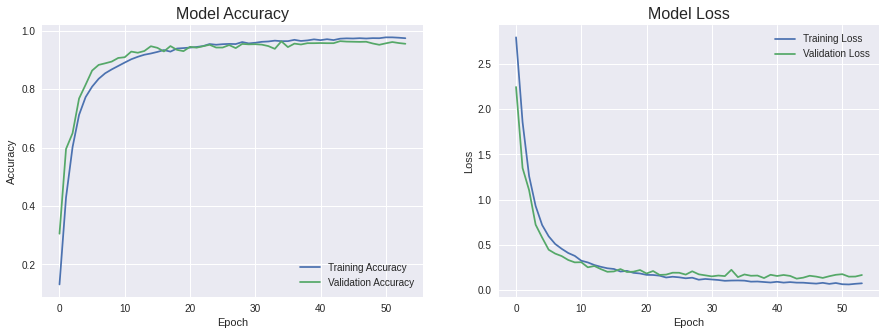

In [22]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.style.use("seaborn")
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

ax[0].plot(acc, label = "Training Accuracy")
ax[0].plot(val_acc, label = "Validation Accuracy")
ax[0].legend(loc = "lower right")
ax[0].set_title("Model Accuracy", fontsize = 16)
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Accuracy")

ax[1].plot(loss, label = "Training Loss")
ax[1].plot(val_loss, label = "Validation Loss")
ax[1].legend(loc = "upper right")
ax[1].set_title("Model Loss", fontsize = 16)
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")

plt.show()

### I. Menyalin Model

Menyalin model terbaik yang telah disimpan dengan callback selama proses training berlangsung ke dalam Google Drive.

In [24]:
!cp /content/model.h5 "/content/gdrive/My Drive/Kaggle/Hanacaraka"

---

<div class="alert alert-block alert-info">
    <b>Info:</b> Untuk poin A - I di atas dijalankan menggunakan Google Colab, sedangkan poin J - L di bawah ini dijalankan menggunakan Jupyter Notebook karena Google Colab tidak men-support library tkinter milik python yang digunakan untuk membuat GUI ( Graphical User Interface ) aplikasi dekstop.
</div>

### J. Load Model

Setelah model disimpan pada Google Drive, model tersebut akan didownload dan diload untuk uji coba.

Link download model: https://github.com/arryaaas/Hanacaraka-Digital-Handwriting-CNN/blob/main/model.h5

In [4]:
from keras.models import load_model

load_model = load_model("D:/Code/Notebook/hanacaraka-digital-handwriting-cnn/model.h5")

### K. Uji Coba Menggunakan Gambar

Data yang digunakan untuk uji coba ini adalah data baru yang tidak terlibat sama sekali dalam proses training.

Link download gambar: https://github.com/arryaaas/Hanacaraka-Digital-Handwriting-CNN/tree/main/prediction

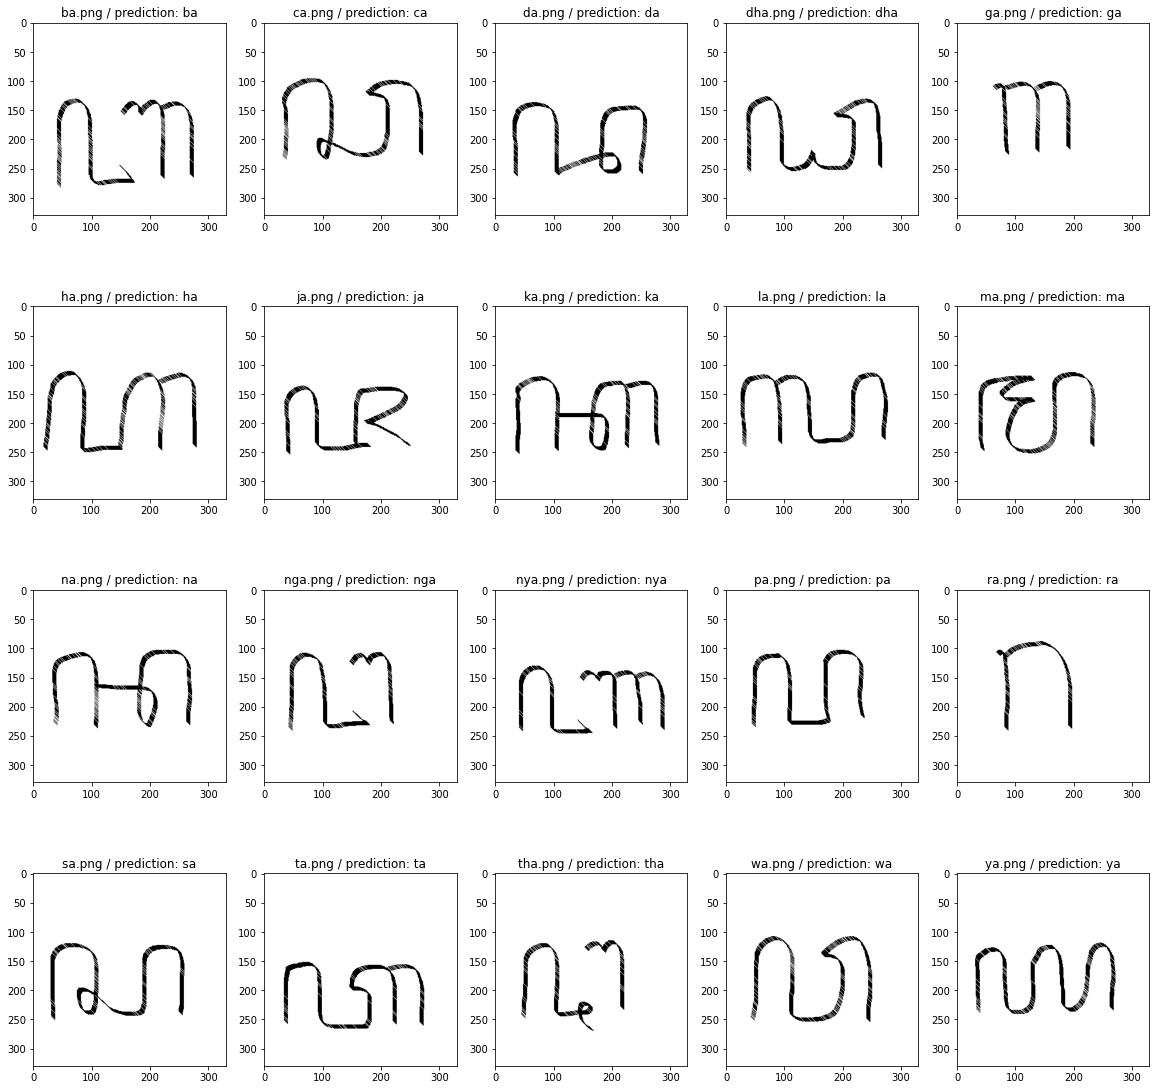

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

classes = [
    "ba", "ca", "da", "dha", "ga", "ha", "ja", "ka", "la", "ma",
    "na", "nga", "nya", "pa", "ra", "sa", "ta", "tha", "wa", "ya"
]

path = "D:/Code/Notebook/hanacaraka-digital-handwriting-cnn/prediction"
fig, ax = plt.subplots(nrows = 4, ncols = 5, figsize = (20, 20))

x = 0
for y, img_name in enumerate(os.listdir(path)):
    img_path = "{}{}{}".format(path, "/", img_name)
    img = image.load_img(img_path, color_mode = "grayscale", target_size = (100, 100))
    
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    
    result = load_model.predict(img)
    
    img_preview = mpimg.imread(img_path)
    
    if (y > 1) and (y % 5 == 0): 
        x += 1
    
    ax[x, (y % 5)].set_title("{} / prediction: {}".format(img_name, classes[np.argmax(result)]))
    ax[x, (y % 5)].imshow(img_preview)

### L. Uji Coba Menggunakan Digital Handwriting

In [6]:
import numpy as np
from tkinter import *
from PIL import Image, ImageDraw
from keras.preprocessing import image

def paint(event):
    x1, y1 = (event.x-3), (event.y-3)
    x2, y2 = (event.x+3), (event.y+3)
    canvas.create_oval(x1, y1, x2, y2, fill = "black", outline = "black")
    draw.line([x1, y1, x2, y2], fill = "black")

def delete():
    canvas.delete(ALL)
    draw.rectangle((0, 0, 330, 330), fill = "white")
    
    result["text"] = "Result: --"
    
def classification():
    filename = "D:/Code/Notebook/hanacaraka-digital-handwriting-cnn/images/temp.png"
    empty_image.save(filename)
    
    classes = [
        "ba", "ca", "da", "dha", "ga", "ha", "ja", "ka", "la", "ma",
        "na", "nga", "nya", "pa", "ra", "sa", "ta", "tha", "wa", "ya"
    ]

    img = image.load_img(filename, color_mode = "grayscale", target_size = (100, 100))

    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    result["text"] = "Result: {}".format(
        classes[np.argmax(load_model.predict(img))]
    )

empty_image = Image.new("RGB", (330, 330), (255, 255, 255))
draw = ImageDraw.Draw(empty_image)

root = Tk()
root.title("Pattern Recognition - Handwriting")
root.configure(background = "#FFFFFF")

title = Label(root, font = ("arial", "12", "bold"), text = "Hanacaraka Digital Handwriting - CNN", bg = "#FFFFFF")
title.pack(pady = (10, 0))

subtitle = Label(root, font = ("poppins", "10"), text = "Mochammad Arya Salsabila / 19081010001", bg = "#FFFFFF")
subtitle.pack(pady = (4, 0))

canvas = Canvas(root, width = 330, height = 330, bg = "white", highlightthickness = 1, highlightbackground = "#909090")
canvas.bind("<B1-Motion>", paint)
canvas.pack(padx = 10, pady = (10, 0))

pane = Frame(root, bg = "#FFFFFF")
pane.pack(fill = BOTH, pady = (10, 0))

clear = Button(pane, text = "Clear", command = delete, relief = GROOVE, bg = "#FF5264", fg = "#FFFFFF")
clear.pack(side = LEFT, expand = True, fill = BOTH, padx = 10)

predict = Button(pane, text = "Prediction", command = classification, relief = GROOVE, bg = "#FFFFFF")
predict.pack(side = LEFT, expand = True, fill = BOTH, padx = 10)

result = Label(font = ("arial", "12", "bold"), text = "Result: --", bg = "white")
result.pack(expand = True, fill = BOTH, padx = 10, pady = 16)

root.mainloop()

Tampilan GUI ( Graphical User Interface ):

![Graphical User Interface](images/graphical_user_interface.svg)